# Lista 5


## Técnicas de Inteligência Computacional ll

## Prof. [Gerson de Souza Faria](http://systemssoperfect.com) 

[gerson.faria@fgv.br](mailto:gerson.faria@fgv.br) 


versão 0.2 (Agosto/2020)

***

# Exercício: multiplicação por exemplos

As redes neurais artificiais tem como princípio a capacidade de generalização via aprendizado por exemplos.


>Apresente os resultados em forma tabulada, de tabuada, marcando em vermelho os resultados errados, se houver. Comente e compare os resultados entre os exeperimentos.




**(1)** Treine uma rede neural artificial (não precisa ser profunda!) utilizando alguma biblioteca de *machine learning* (Matlab, Python, R etc) que aprenda tabuada de multiplicação do 1 ao 15. A biblioteca *scikit learn* é uma boa opção em Python.


In [1]:
import pandas as pd

tabuada = [(1, 15, i) for i in range(1, 16)]
tabuada_df = pd.DataFrame(tabuada)
tabuada_df.columns = ['val1','val15','val']
tabuada_df['tabuada_1'] = tabuada_df['val1'] *  tabuada_df['val']
tabuada_df['tabuada_15'] = tabuada_df['val15'] *  tabuada_df['val']
tabuada_df

,val1,val15,val,tabuada_1,tabuada_15
0,1,15,1,1,15
1,1,15,2,2,30
2,1,15,3,3,45
3,1,15,4,4,60
4,1,15,5,5,75
5,1,15,6,6,90
6,1,15,7,7,105
7,1,15,8,8,120
8,1,15,9,9,135
9,1,15,10,10,150


In [2]:
X1 = tabuada_df[['val1', 'val']]
y1 = tabuada_df[['tabuada_1']]

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=1)
regr1 = MLPRegressor(random_state=1).fit(X1_train, y1_train)
y1_pred = regr1.predict(X1_test)

C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
# mean squared error
mean_squared_error(y1_test, y1_pred)

0.052228796689170034

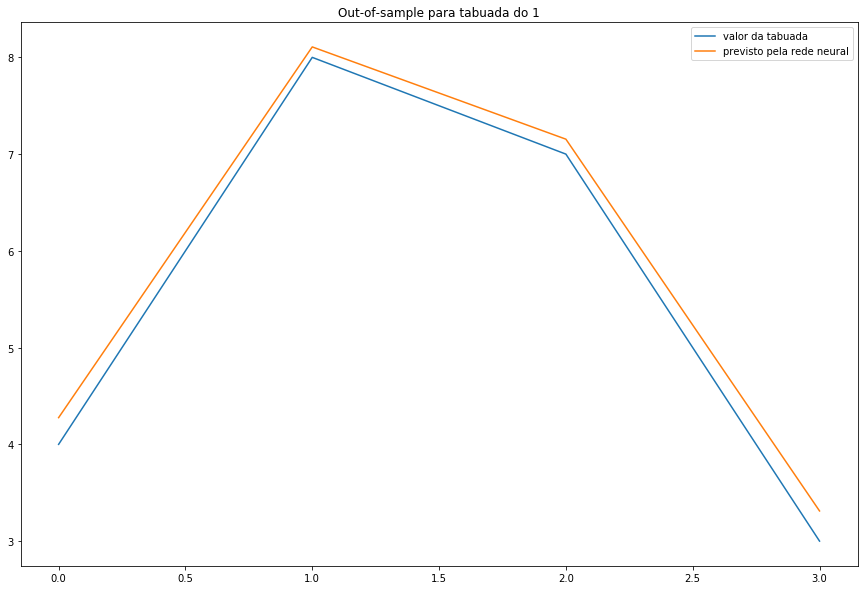

In [30]:
plot1_df = pd.concat([y1_test.reset_index(drop=True), pd.DataFrame(y1_pred).reset_index(drop=True)], axis=1)
plot1_df.columns = ['valor da tabuada', 'previsto pela rede neural']
plot1_df.plot(figsize=(15, 10), title='Out-of-sample para tabuada do 1')

In [25]:
X15 = tabuada_df[['val15', 'val']]
y15 = tabuada_df[['tabuada_15']]

X15_train, X15_test, y15_train, y15_test = train_test_split(X15, y15, random_state=1)
regr15 = MLPRegressor(random_state=1).fit(X15_train, y15_train)
y15_pred = regr15.predict(X15_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [27]:
# mean squared error
mean_squared_error(y15_test, y15_pred)

583.5810152427077

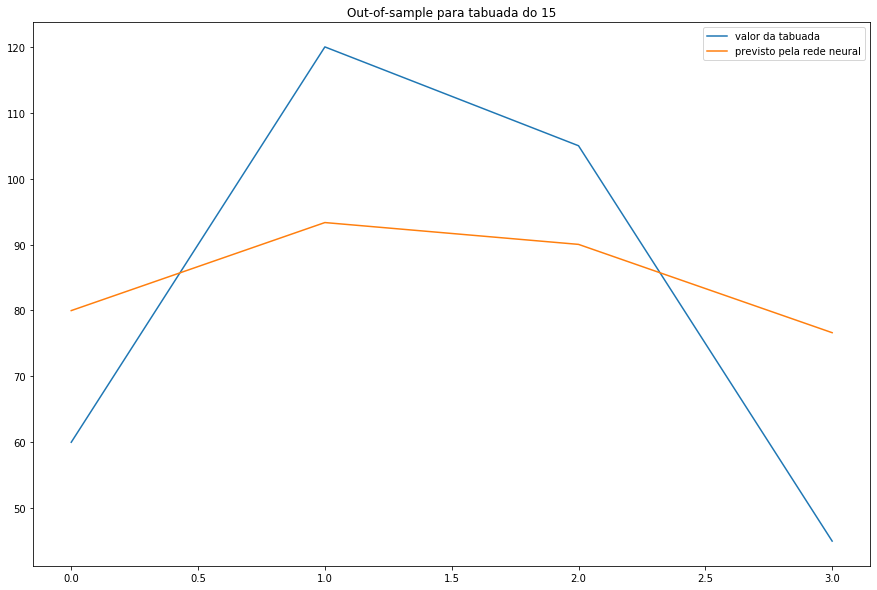

In [29]:
plot15_df = pd.concat([y15_test.reset_index(drop=True), pd.DataFrame(y15_pred).reset_index(drop=True)], axis=1)
plot15_df.columns = ['valor da tabuada', 'previsto pela rede neural']
plot15_df.plot(figsize=(15, 10), title='Out-of-sample para tabuada do 15')

### Tabelas da tabuada

In [35]:
tabuada1_final = pd.concat([X1_test.reset_index(drop=True), plot1_df], axis=1)
tabuada1_final

,val1,val,valor da tabuada,previsto pela rede neural
0,1,4,4,4.276071
1,1,8,8,8.108150
2,1,7,7,7.154486
3,1,3,3,3.311669


In [36]:
tabuada15_final = pd.concat([X15_test.reset_index(drop=True), plot15_df], axis=1)
tabuada15_final

,val15,val,valor da tabuada,previsto pela rede neural
0,15,4,60,79.981963
1,15,8,120,93.342598
2,15,7,105,90.030365
3,15,3,45,76.628124


**(2)** Faça um programa genético que aprenda a mesma tarefa. 


In [63]:
pontos = X1.values
pontos

array([[ 1,  1],
       [ 1,  2],
       [ 1,  3],
       [ 1,  4],
       [ 1,  5],
       [ 1,  6],
       [ 1,  7],
       [ 1,  8],
       [ 1,  9],
       [ 1, 10],
       [ 1, 11],
       [ 1, 12],
       [ 1, 13],
       [ 1, 14],
       [ 1, 15]], dtype=int64)

In [60]:
y1.head()

,tabuada_1
0,1
1,2
2,3
3,4
4,5


In [64]:
from deap import gp
import operator
from deap import creator
from deap import base
from deap import tools
import numpy as np
from deap import algorithms
import math


def tabuada_do_1(*args):
    arg1, arg2 = args
    return arg1 * arg2


def avaliaFitness(individuo, points):
    func = toolbox.compilador(expr=individuo)
    sqerrors = ((func(*args) - tabuada_do_1(*args)) ** 2 for args in points)

    return (math.fsum(sqerrors) / len(points),)


def main():
    pop = toolbox.populacao(n=1500)
    hof = tools.HallOfFame(4)

    CXPB = .9
    MTPB = .01

    stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
    stats_size = tools.Statistics(len)
    mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)

    mstats.register("avg", np.mean)
    mstats.register("std", np.std)
    mstats.register("min", np.min)
    mstats.register("max", np.max)

    pop, log = algorithms.eaSimple(pop,
                                   toolbox,
                                   CXPB,
                                   MTPB,
                                   50,
                                   stats=mstats,
                                   halloffame=hof,
                                   verbose=True)

    return pop, log, hof




In [95]:
pset = gp.PrimitiveSet("MAIN", 2)

pset.addPrimitive(operator.add, 2)  # da biblioteca 'operator' do python
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.neg, 1)

pset.renameArguments(ARG0='val1')
pset.renameArguments(ARG0='val')

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individuo", gp.PrimitiveTree, fitness=creator.FitnessMin)

# TABUADA DO 1
toolbox = base.Toolbox()

toolbox.register("expressao", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individuo", tools.initIterate, creator.Individuo, toolbox.expressao)
toolbox.register("populacao", tools.initRepeat, list, toolbox.individuo)
toolbox.register("compilador", gp.compile, pset=pset)

toolbox.register("evaluate", avaliaFitness, points=pontos)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=3))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=3))


pop, log, hof = main()

C:\ProgramData\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


   	      	                    fitness                    	                      size                     
   	      	-----------------------------------------------	-----------------------------------------------
gen	nevals	avg    	gen	max    	min	nevals	std    	avg  	gen	max	min	nevals	std    
0  	1500  	149.599	0  	1322.67	0  	1500  	176.541	3.738	0  	7  	2  	1500  	1.56035
1  	1345  	81.31  	1  	744    	0  	1345  	107.123	3.85067	1  	9  	2  	1345  	1.46982
2  	1315  	57.3331	2  	744    	0  	1315  	79.7489	4      	2  	9  	1  	1315  	1.46561
3  	1326  	51.0418	3  	363.667	0  	1326  	72.7971	4.03467	3  	10 	1  	1326  	1.43717
4  	1338  	46.1649	4  	697    	0  	1338  	70.4512	4.15133	4  	11 	1  	1338  	1.51232
5  	1309  	44.3544	5  	363.667	0  	1309  	67.0636	4.216  	5  	10 	1  	1309  	1.59458
6  	1369  	39.698 	6  	697    	0  	1369  	59.2662	4.18867	6  	10 	1  	1369  	1.66525
7  	1365  	34.8213	7  	697    	0  	1365  	64.4702	3.95067	7  	13 	1  	1365  	1.90339
8  	1335  	19.7584	8  	36

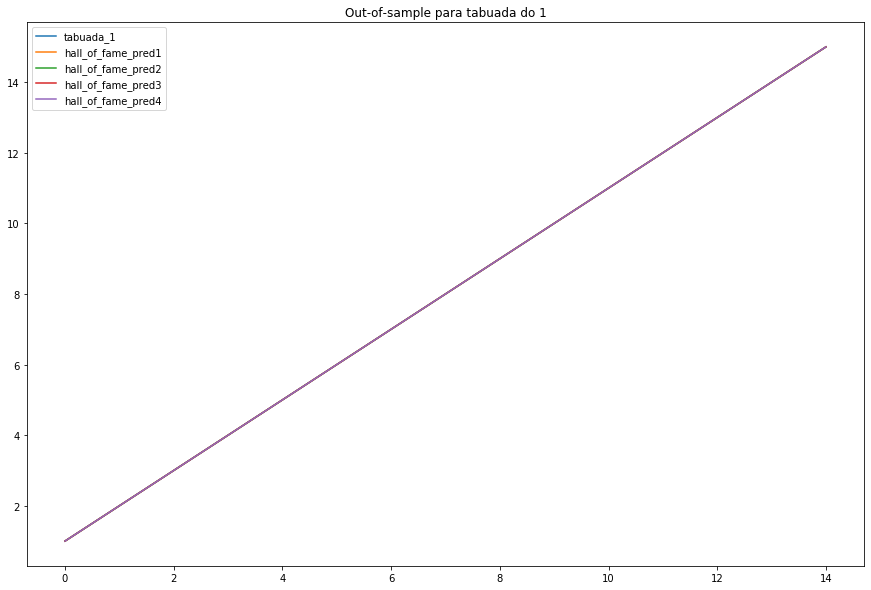

In [115]:
import matplotlib.pyplot as plt

list_y = []
for i in range(0, 4):  
    func = toolbox.compilador(expr=hof[i])
    y =  [func(x[0], x[1]) for x in pontos]
    list_y.append(y)
pred_y = pd.DataFrame(list_y).T
pred_y.columns = ['hall_of_fame_pred1', 'hall_of_fame_pred2', 'hall_of_fame_pred3', 'hall_of_fame_pred4']
plot1_df = pd.concat([y1, pred_y], axis=1)

plot1_df.plot(figsize=(15, 10), title='Out-of-sample para tabuada do 1')

In [126]:
plot1_df

,tabuada_1,hall_of_fame_pred1,hall_of_fame_pred2,hall_of_fame_pred3,hall_of_fame_pred4
0,1,1,1,1,1
1,2,2,2,2,2
2,3,3,3,3,3
3,4,4,4,4,4
4,5,5,5,5,5
5,6,6,6,6,6
6,7,7,7,7,7
7,8,8,8,8,8
8,9,9,9,9,9
9,10,10,10,10,10


In [123]:
# TABUADA DO 15
pontos = X15.values

toolbox = base.Toolbox()

toolbox.register("expressao", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individuo", tools.initIterate, creator.Individuo, toolbox.expressao)
toolbox.register("populacao", tools.initRepeat, list, toolbox.individuo)
toolbox.register("compilador", gp.compile, pset=pset)

toolbox.register("evaluate", avaliaFitness, points=pontos)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=3))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=3))


pop, log, hof = main()

   	      	                    fitness                    	                      size                     
   	      	-----------------------------------------------	-----------------------------------------------
gen	nevals	avg    	gen	max    	min 	nevals	std    	avg    	gen	max	min	nevals	std    
0  	1500  	18228.2	0  	29742.7	7800	1500  	4199.47	3.80867	0  	7  	2  	1500  	1.63301
1  	1325  	15186.9	1  	29742.7	6635.67	1325  	3628.43	4.15067	1  	9  	2  	1325  	1.59957
2  	1385  	12729.2	2  	26700  	6635.67	1385  	2740.68	4.496  	2  	10 	2  	1385  	1.66232
3  	1337  	11160.8	3  	22425  	5090.67	1337  	2464.47	5.20533	3  	11 	3  	1337  	1.78078
4  	1354  	9595.01	4  	26700  	5027.67	1354  	2249.51	6.33733	4  	11 	3  	1354  	1.86499
5  	1331  	8438.53	5  	21162.7	3984   	1331  	2241.24	7.39533	5  	13 	1  	1331  	1.95731
6  	1353  	7331.8 	6  	17315.7	3984   	1353  	1798.3 	8.394  	6  	13 	3  	1353  	1.92945
7  	1353  	6536.23	7  	22425  	3042.67	1353  	1658.51	9.29933	7  	15 	2  	1353  

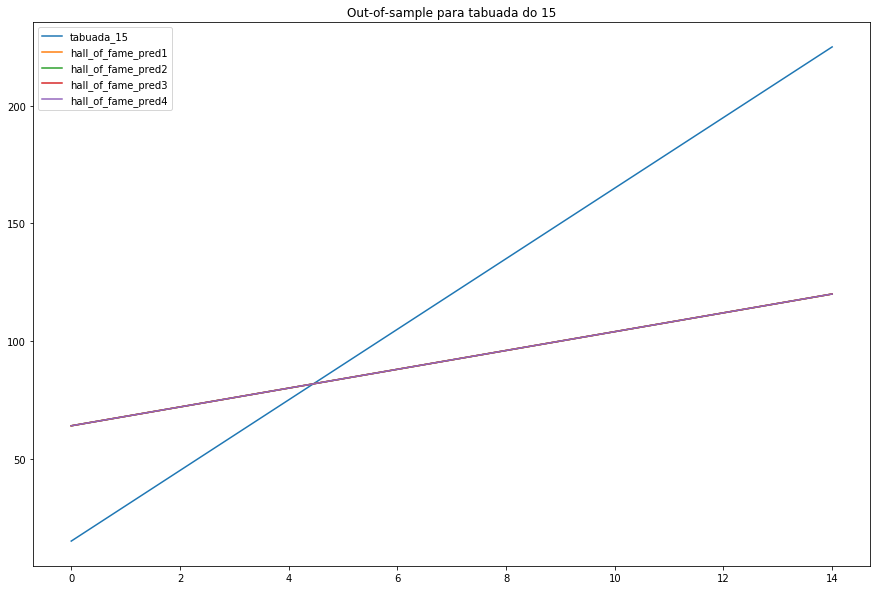

In [124]:
list_y = []
for i in range(0, 4):  
    func = toolbox.compilador(expr=hof[i])
    y =  [func(x[0], x[1]) for x in pontos]
    list_y.append(y)
pred_y = pd.DataFrame(list_y).T
pred_y.columns = ['hall_of_fame_pred1', 'hall_of_fame_pred2', 'hall_of_fame_pred3', 'hall_of_fame_pred4']
plot15_df = pd.concat([y15, pred_y], axis=1)

plot15_df.plot(figsize=(15, 10), title='Out-of-sample para tabuada do 15')

In [125]:
plot15_df

,tabuada_15,hall_of_fame_pred1,hall_of_fame_pred2,hall_of_fame_pred3,hall_of_fame_pred4
0,15,64,64,64,64
1,30,68,68,68,68
2,45,72,72,72,72
3,60,76,76,76,76
4,75,80,80,80,80
5,90,84,84,84,84
6,105,88,88,88,88
7,120,92,92,92,92
8,135,96,96,96,96
9,150,100,100,100,100


**Obs.**

Tabuada do 1

1 x 0 = 0 até 1 x 15 = 15

Tabuada do 15

15 x 0 = 0 até 15 x 15 = 225

Um modo de representar os números que pode ser útil é a representação binária (base 2).

Assim, o número 2 na base 10, ($2_{10}$) tem a representação na base 2 == $10_2$. O número $15_{10}$ == $1111_2$. Isso facilita a representação na rede neural. Como exemplo:


entradas da rede: ($1111_2$, $1000_2$)

saída correta da rede: $01111000_2$

In [3]:
oct(15)

'0o17'

Um modo simples de se obter uma lista numérica com a representação binária de um número inteiro é:

In [5]:
n = 1545

[int(i) for i in bin(n)[2:]]

[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1]

Eu utilizei a tabuada máxima do 15 pois é possível representar entrada e saída com 8 bits. Mas você pode generalizar e criar tabuada do tamanho que quiser. Você pode representar os números de outra forma, se achar mais conveniente.

# Referências

[Deep Learning Book](https://www.deeplearningbook.org/) Livro online, por Ian Goodfellow, Yoshua Bengio & Aaron Courville.

[Deep Learning](https://www.nature.com/articles/nature14539) por Yann LeCun, Yoshua Bengio & Geoffrey Hinton

[ImageNet Classification with Deep Convolutional Neural Networks](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) por Alex Krizhevsky, Ilya Sutskever & Geoffrey E. Hinton

[Understanding the difficulty of training deep feedforward neural networks](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf) por Xavier Glorot e Yoshua Bengio

[Deep Learning: A critical appraisal](https://arxiv.org/abs/1801.00631) por Gary Marcus

[Human-Level Intelligence or Animal-Like Abilities?](https://arxiv.org/abs/1707.04327) por Adnan Darwiche